<a href="https://colab.research.google.com/github/20WH1A6637/HousingPricesPrediction/blob/main/HousePricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Housing Prices/train.csv")

In [ ]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [ ]:
df.shape

(37137, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [ ]:
df.isnull().sum()       #No null values or missing values found

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [ ]:
df1 = df.copy()

In [ ]:
df1

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [ ]:
gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))

In [ ]:
print(gdf.head())

   id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1   1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2   2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3   3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4   4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal                     geometry  
0    -120.12        0.980  POINT (-120.12000 34.60000)  
1    -121.22        0.946  POINT (-121.22000 38.69000)  
2    -120.45        1.576  POINT (-120.45000 34.71000)  
3    -117.09        1.336  POINT (-117.09000 32.66000)  
4    -122.41        4.500  POINT (-122.41000 37.80000)  


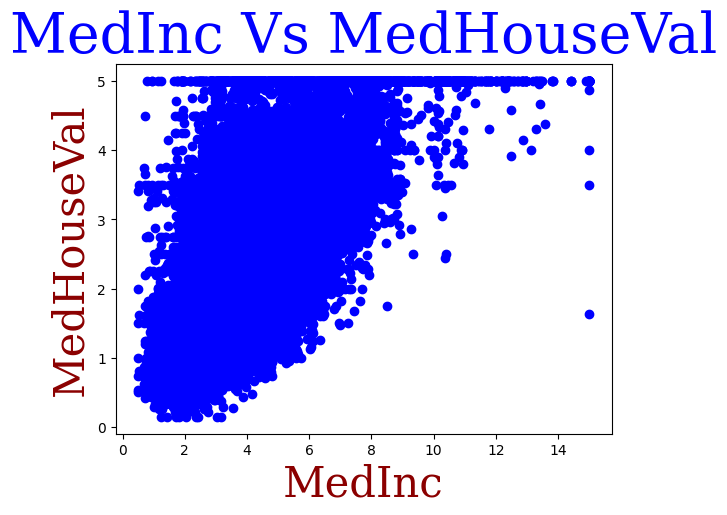

In [ ]:
x = df1['MedInc']
y = df1['MedHouseVal']
plt.title("MedInc Vs MedHouseVal", fontdict = {'family':'serif','color':'blue','size':40})
plt.xlabel("MedInc", fontdict = {'family':'serif','color':'darkred','size':30})
plt.ylabel("MedHouseVal", fontdict = {'family':'serif','color':'darkred','size':30})
plt.rcParams['figure.figsize'] = [28, 10]
plt.scatter(x, y, c ="blue")
plt.show()

From the above graph we can observe that MedHouse Value increases as the Med income increases, showing that there is a positive relationship between these two variables. 

But we can also see some outliers!



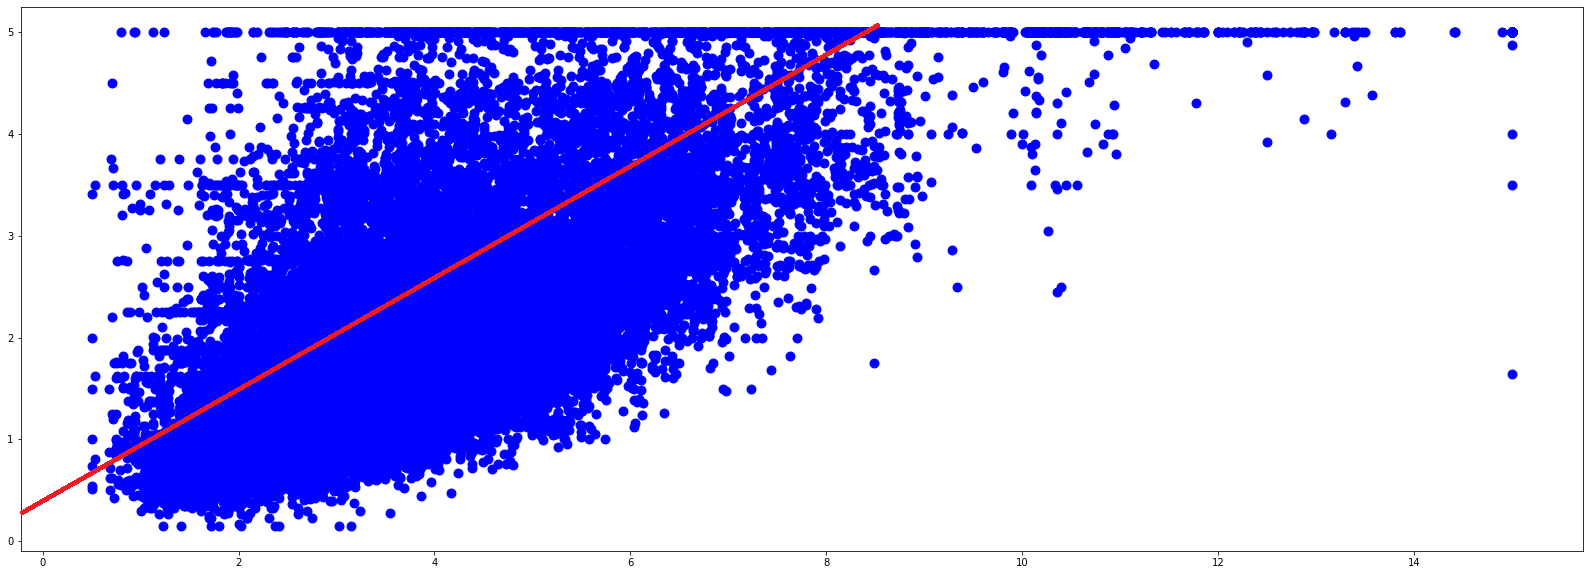

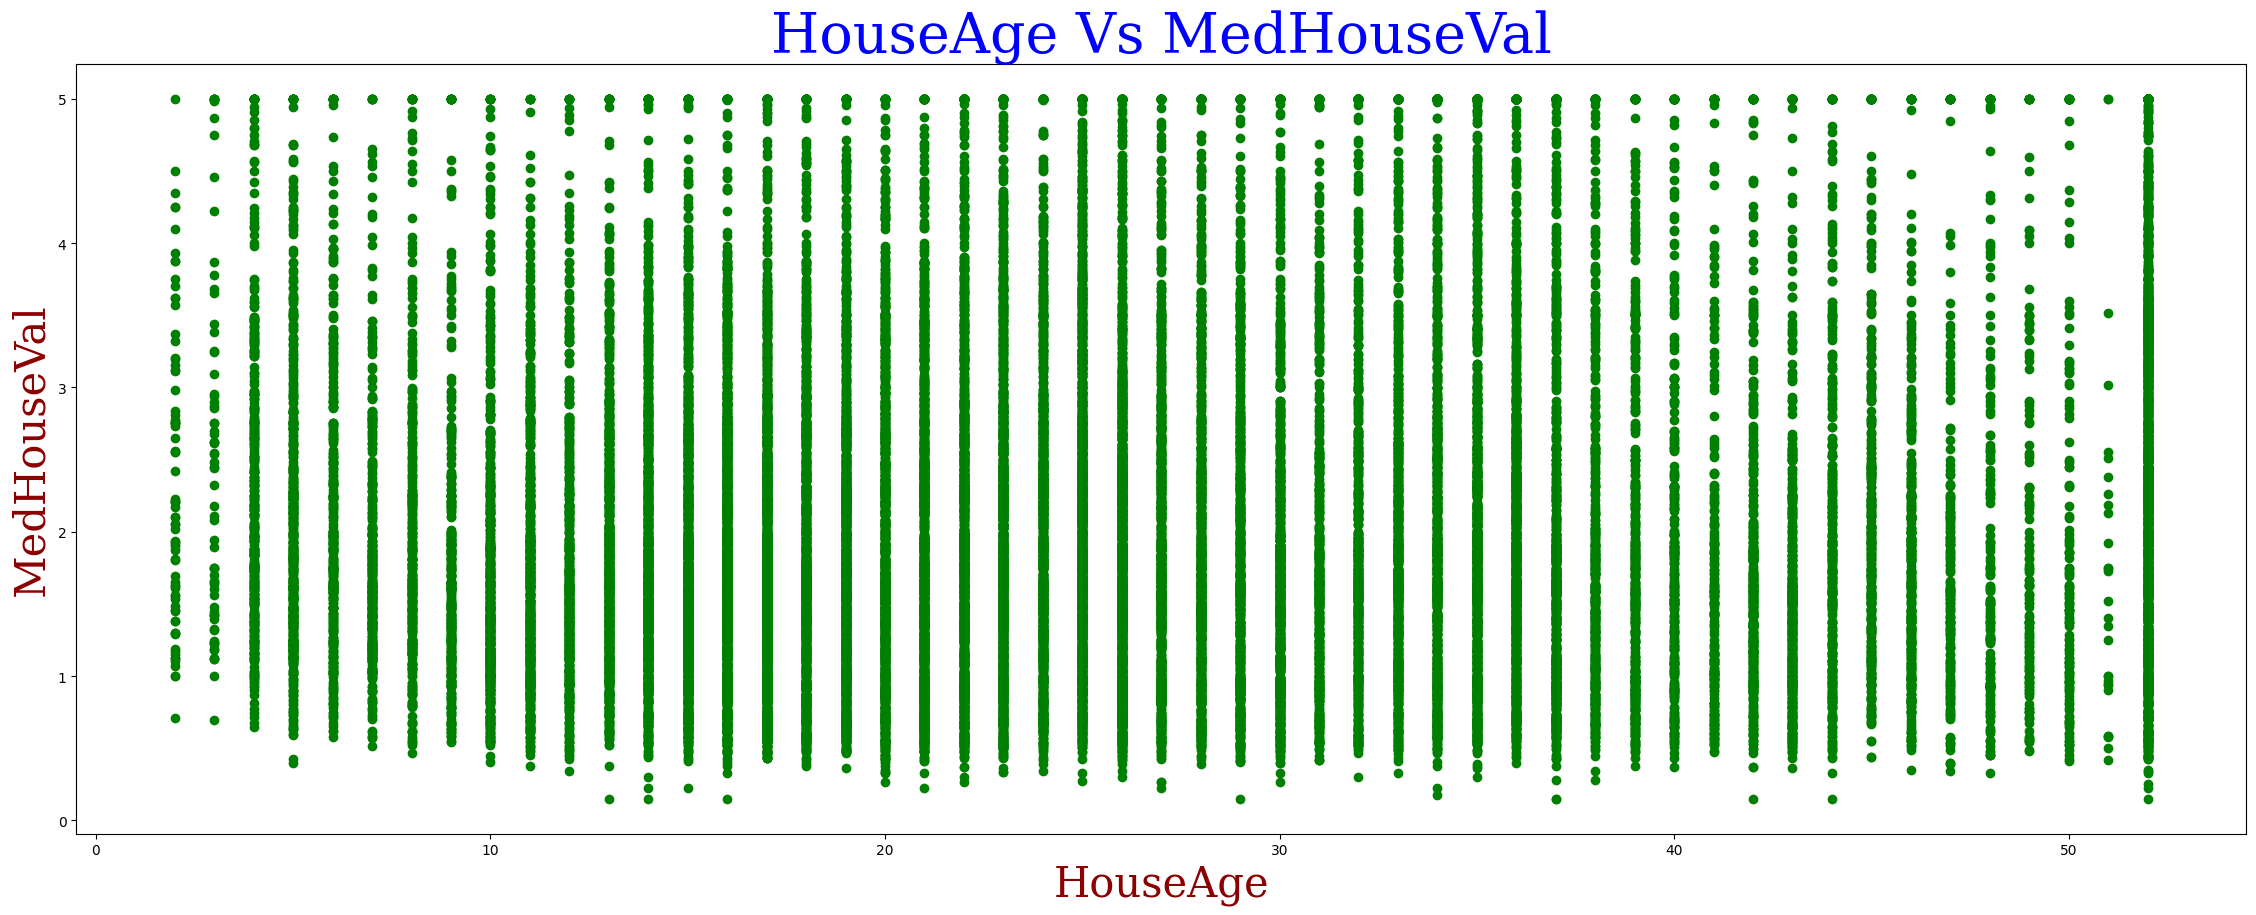

In [ ]:
x = df1['HouseAge']
y = df1['MedHouseVal']

plt.title("HouseAge Vs MedHouseVal", fontdict = {'family':'serif','color':'blue','size':40})
plt.xlabel("HouseAge", fontdict = {'family':'serif','color':'darkred','size':30})
plt.ylabel("MedHouseVal", fontdict = {'family':'serif','color':'darkred','size':30})

plt.scatter(x, y, c ="g")
plt.show()

*   FROM THE ABOVE GRAPH WE ARE ABLE TO OBSERVE THAT WHAT EVER MIGHT BE THE HOUSE AGE, THE MED HOUSE VALUE COVERS THE WHOLE RANGE.
*   SO I THINK THERE IS NO CORRELATION BETWEEN HOUSE AGE AND MEDHOUSEVAL



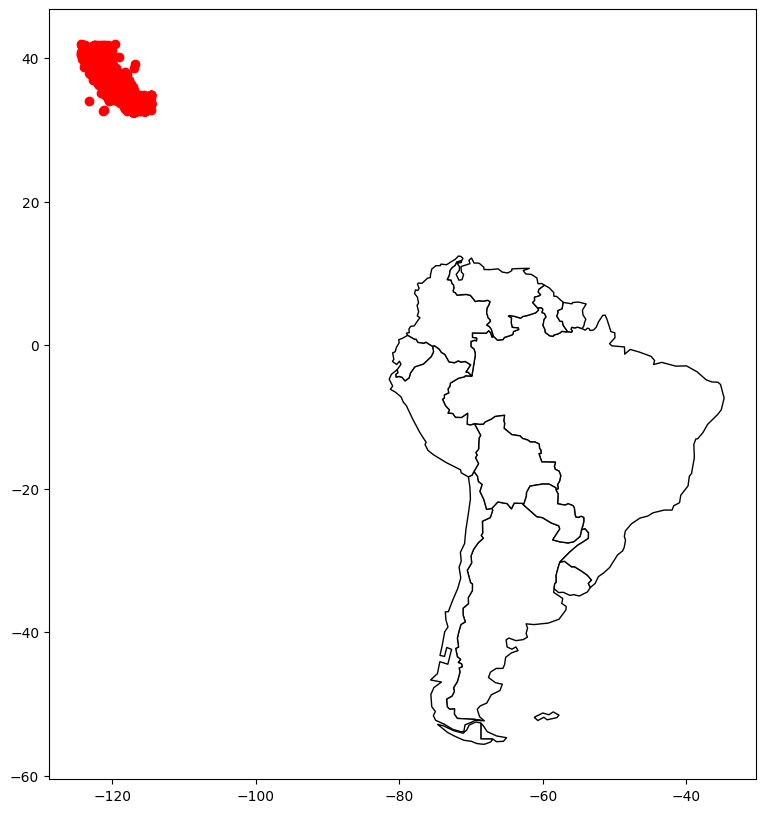

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

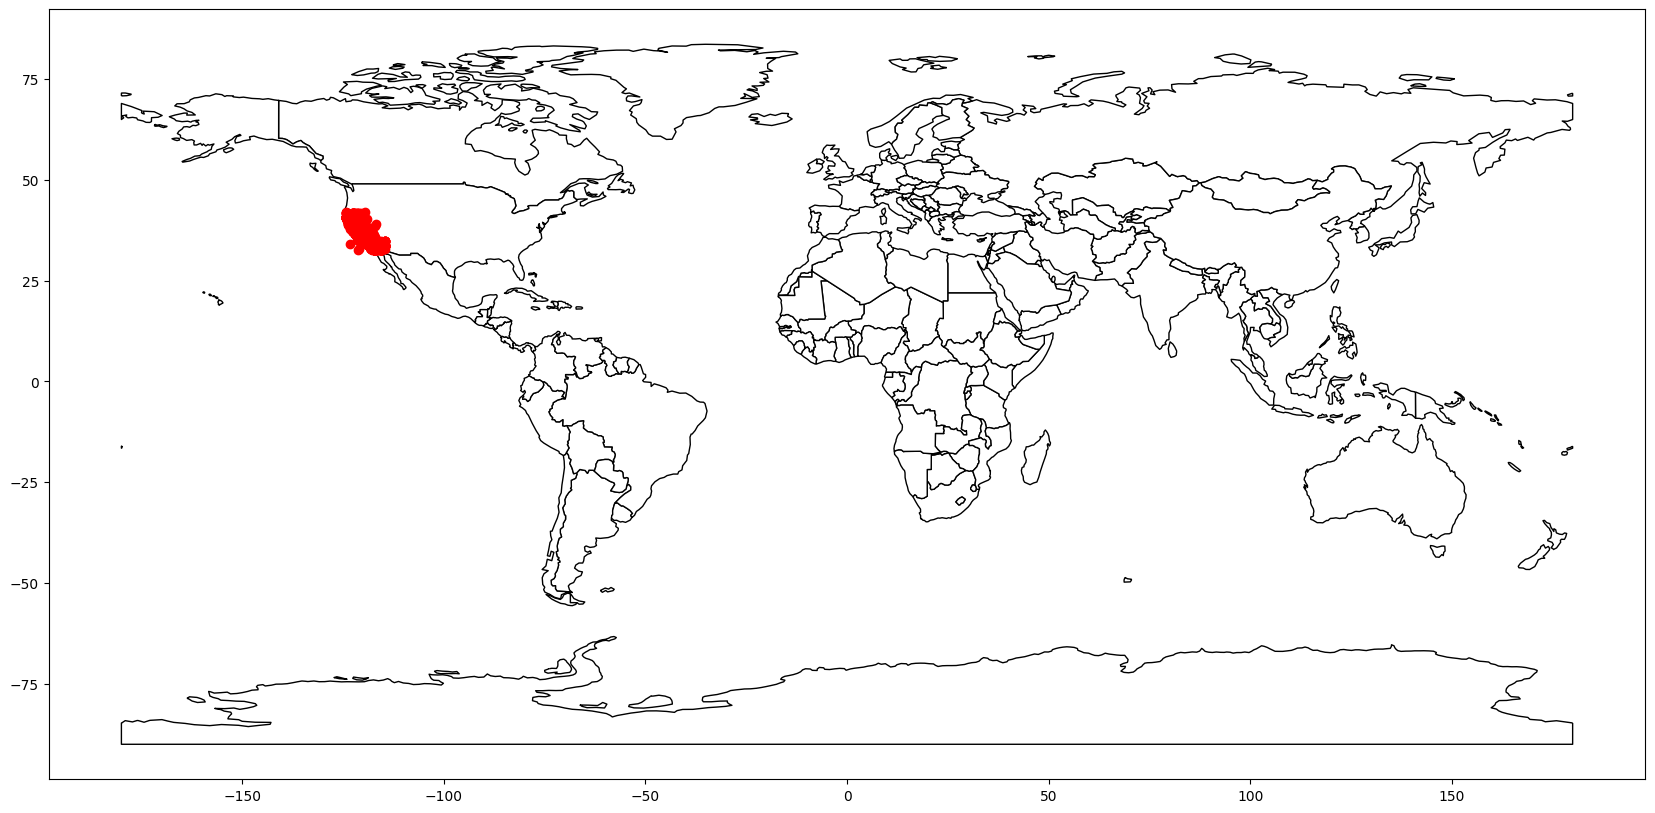

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

plt.show()

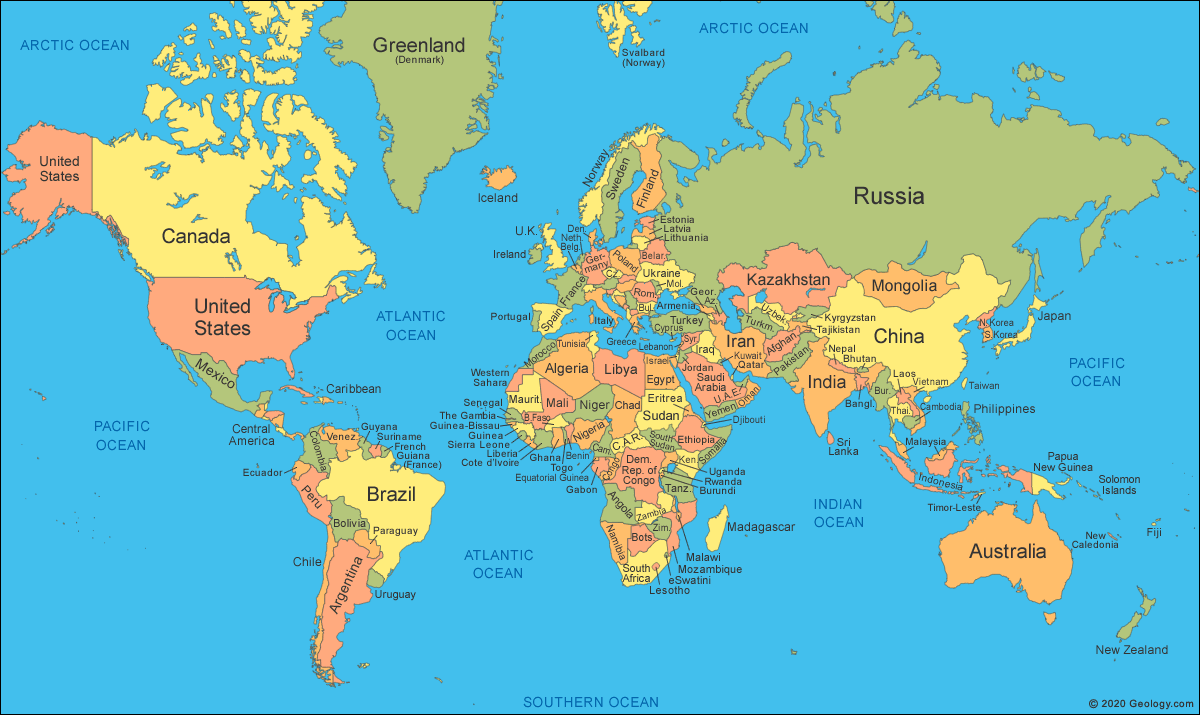

In [ ]:
df1.corr()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000,0.000312,-0.001248,-0.000506,-0.004370,0.002427,-0.000980,-0.000911,0.001887,-0.001358
MedInc,0.000312,1.000000,-0.080542,0.699994,-0.127169,-0.008552,-0.000885,-0.060463,-0.043742,0.701925
HouseAge,-0.001248,-0.080542,1.000000,-0.156625,-0.056960,-0.235459,-0.002792,0.021071,-0.090394,0.103210
AveRooms,-0.000506,0.699994,-0.156625,1.000000,0.174753,-0.038099,0.023858,0.095169,-0.088184,0.366727
AveBedrms,-0.004370,-0.127169,-0.056960,0.174753,1.000000,-0.007120,-0.009257,0.026142,0.015218,-0.067487
Population,0.002427,-0.008552,-0.235459,-0.038099,-0.007120,1.000000,0.022825,-0.069944,0.071085,-0.038479
AveOccup,-0.000980,-0.000885,-0.002792,0.023858,-0.009257,0.022825,1.000000,-0.032199,0.037118,-0.048475
Latitude,-0.000911,-0.060463,0.021071,0.095169,0.026142,-0.069944,-0.032199,1.000000,-0.937370,-0.116499
Longitude,0.001887,-0.043742,-0.090394,-0.088184,0.015218,0.071085,0.037118,-0.937370,1.000000,-0.056742
MedHouseVal,-0.001358,0.701925,0.103210,0.366727,-0.067487,-0.038479,-0.048475,-0.116499,-0.056742,1.000000


<Axes: >

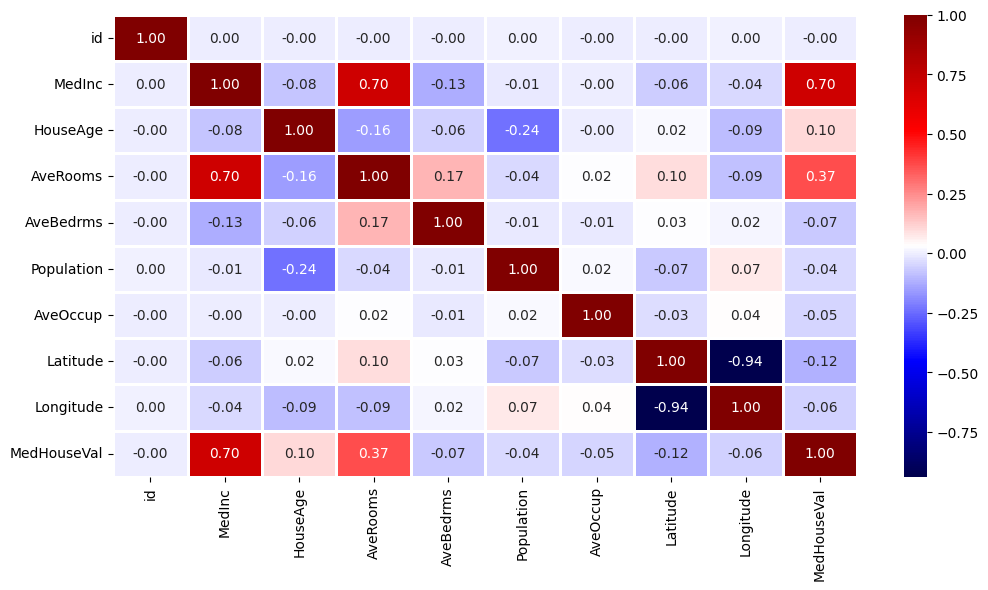

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(), cmap = 'seismic', fmt = '.2f', linewidths = 2, annot = True)

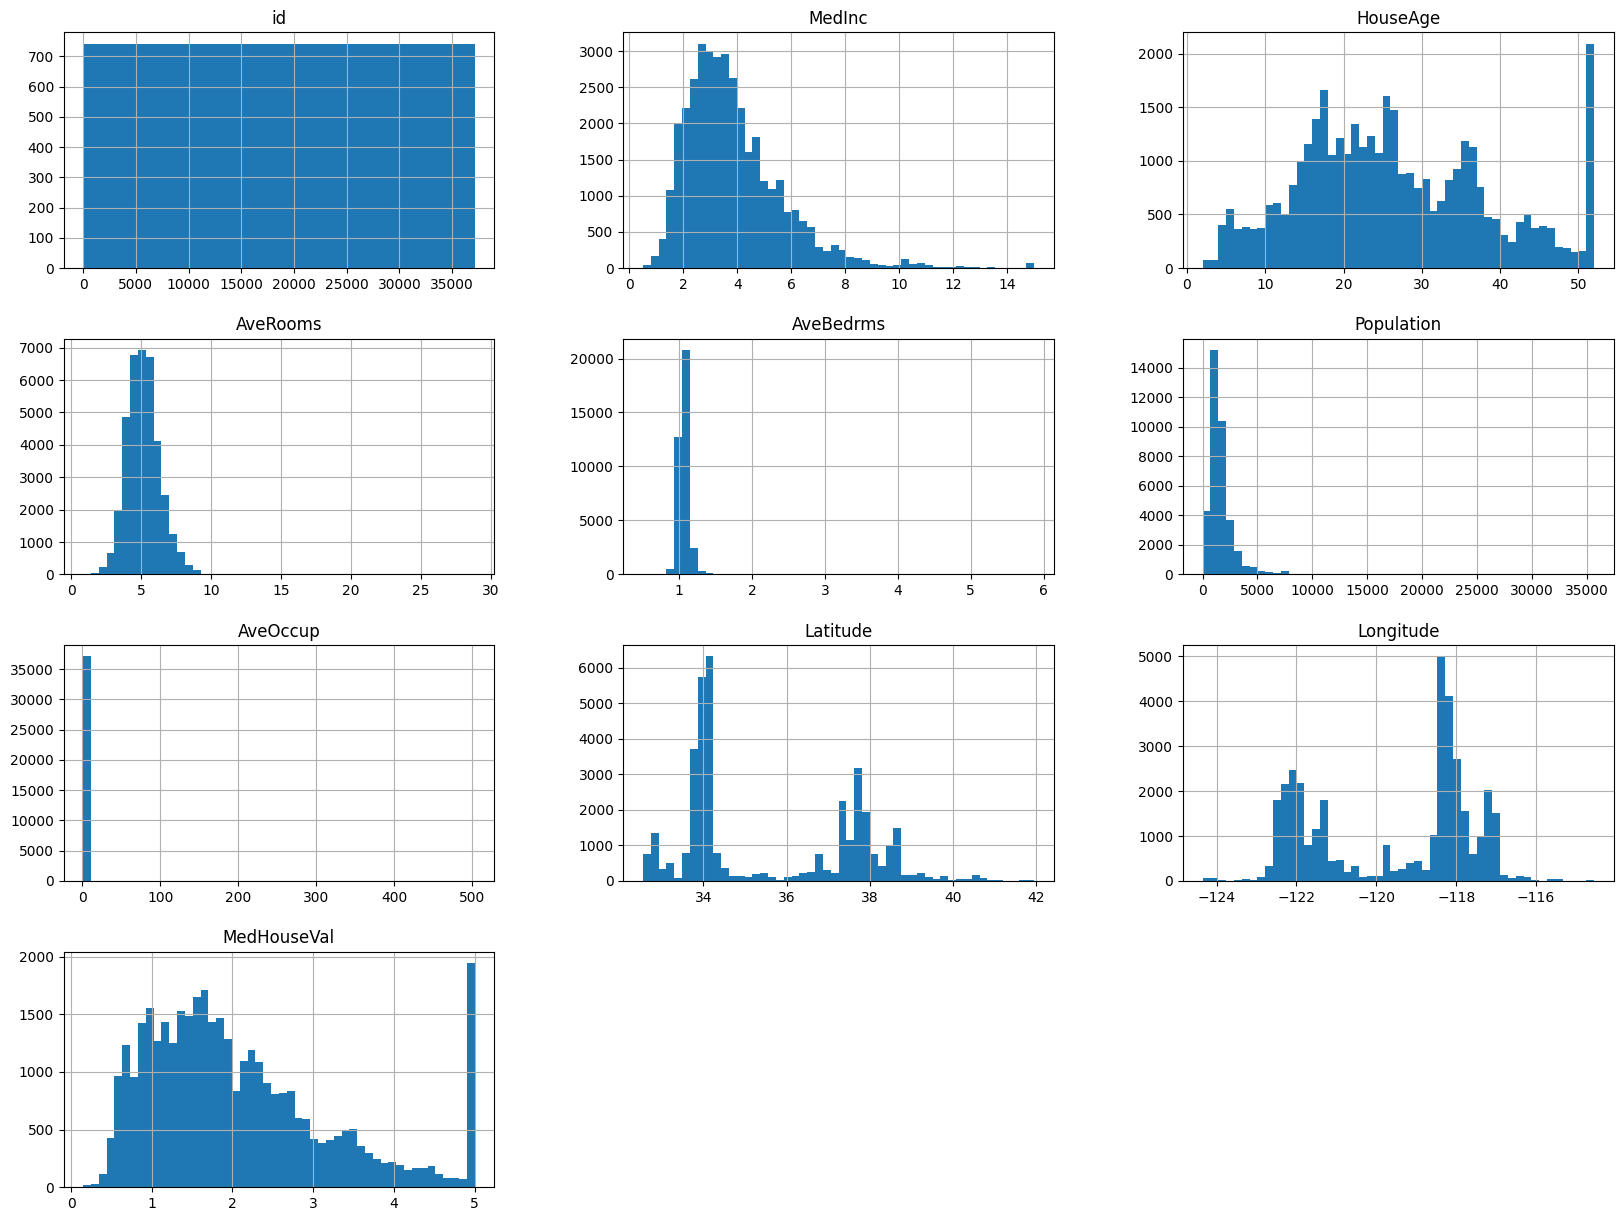

In [ ]:
df.hist(figsize=(20,15), bins=50)
plt.show()

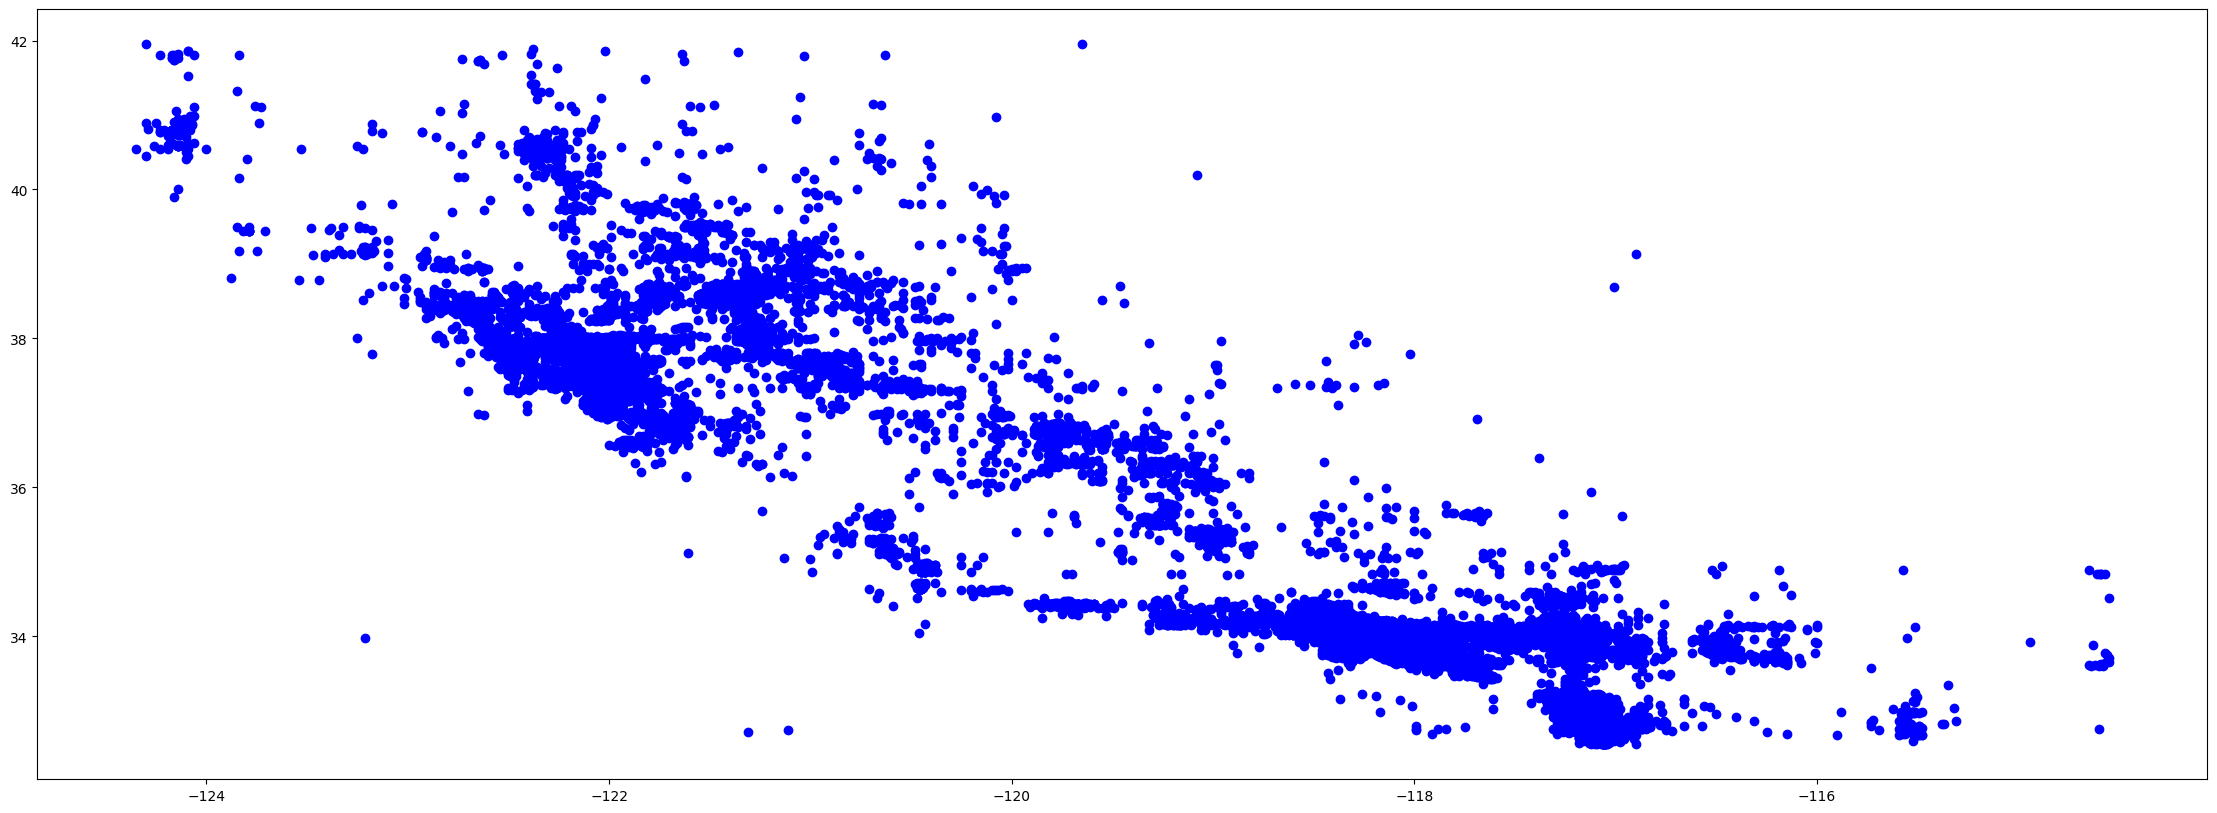

In [ ]:
plt.scatter(x=df["Longitude"], y=df["Latitude"], c = "b")
plt.show()

In [ ]:
df.drop(['id'], axis = 1, inplace = True) 

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [ ]:
X = df.drop(['MedHouseVal'], axis = 1, inplace = False)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41
...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44
37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98


In [ ]:
Y = df['MedHouseVal']
Y

0        0.980
1        0.946
2        1.576
3        1.336
4        4.500
         ...  
37132    1.856
37133    1.588
37134    3.387
37135    1.592
37136    0.652
Name: MedHouseVal, Length: 37137, dtype: float64

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.5365870290913792


In [ ]:
r2_score(Y_valid, Y_pred, multioutput='variance_weighted')

-0.008078575314071523

In [ ]:
mse1 = mean_squared_error(Y_valid, Y_pred)
rmse1 = np.sqrt(mse1)
print(mse1)
print(rmse1)

1.3686914352359023
1.1699108663637168


In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.24112816862952005


In [ ]:
r2_score(Y_valid, Y_pred, multioutput='variance_weighted')

0.7187279592660869

In [ ]:
mse2 = mean_squared_error(Y_valid, Y_pred)
rmse2 = np.sqrt(mse2)
print(mse2)
print(rmse2)

0.3818895099559974
0.6179720948036387


In [ ]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.31246686861073414


In [ ]:
r2_score(Y_valid, Y_pred, multioutput='variance_weighted')

0.6089855115858646

In [ ]:
mse3 = mean_squared_error(Y_valid, Y_pred)
rmse3 = np.sqrt(mse3)
print(mse3)
print(rmse3)

0.5308893517341522
0.7286215421836992


# **MSE**

**SVC**

> 1.36

**RandomForestRegressor**
> 0.38

**LinearRegression()**

> 0.53








In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(max_depth=5)
model_DTR.fit(X_train, Y_train)

Y_pred = model_DTR.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3204985692922053


In [ ]:
r2_score(Y_valid, Y_pred, multioutput='variance_weighted')

0.601743059739681

In [ ]:
mse4 = mean_squared_error(Y_valid, Y_pred)
rmse4 = np.sqrt(mse4)
print(mse4)
print(rmse4)

0.5407225949502293
0.7353384220549266


In [ ]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, Y_train)

Y_pred = model_Ridge.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3124611002212263


In [ ]:
mse5 = mean_squared_error(Y_valid, Y_pred)
rmse5 = np.sqrt(mse5)
print(mse5)
print(rmse5)

0.5308882475099306
0.7286207844344893


In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)

Y_pred = model_lasso.predict(X_valid)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

mse6 = mean_squared_error(Y_valid, Y_pred)
rmse6 = np.sqrt(mse6)
print(f"Mean squared error:{mse6}")
print(f"Root mean squared error:{rmse6}")

0.37423458330483256
Mean squared error:0.6395010525187769
Root mean squared error:0.7996880970220682


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

linear_model = LinearRegression()

linear_model.fit(X_train_poly, Y_train)

X_test_poly = poly.transform(X_valid)

y_pred = linear_model.predict(X_test_poly)

mse7 = mean_squared_error(Y_valid, y_pred)
print('Mean squared error:', mse7)
rmse7 = np.sqrt(mse7)
print(f"Root mean squared error:{rmse7}")

Mean squared error: 0.46240903853366366
Root mean squared error:0.6800066459481581


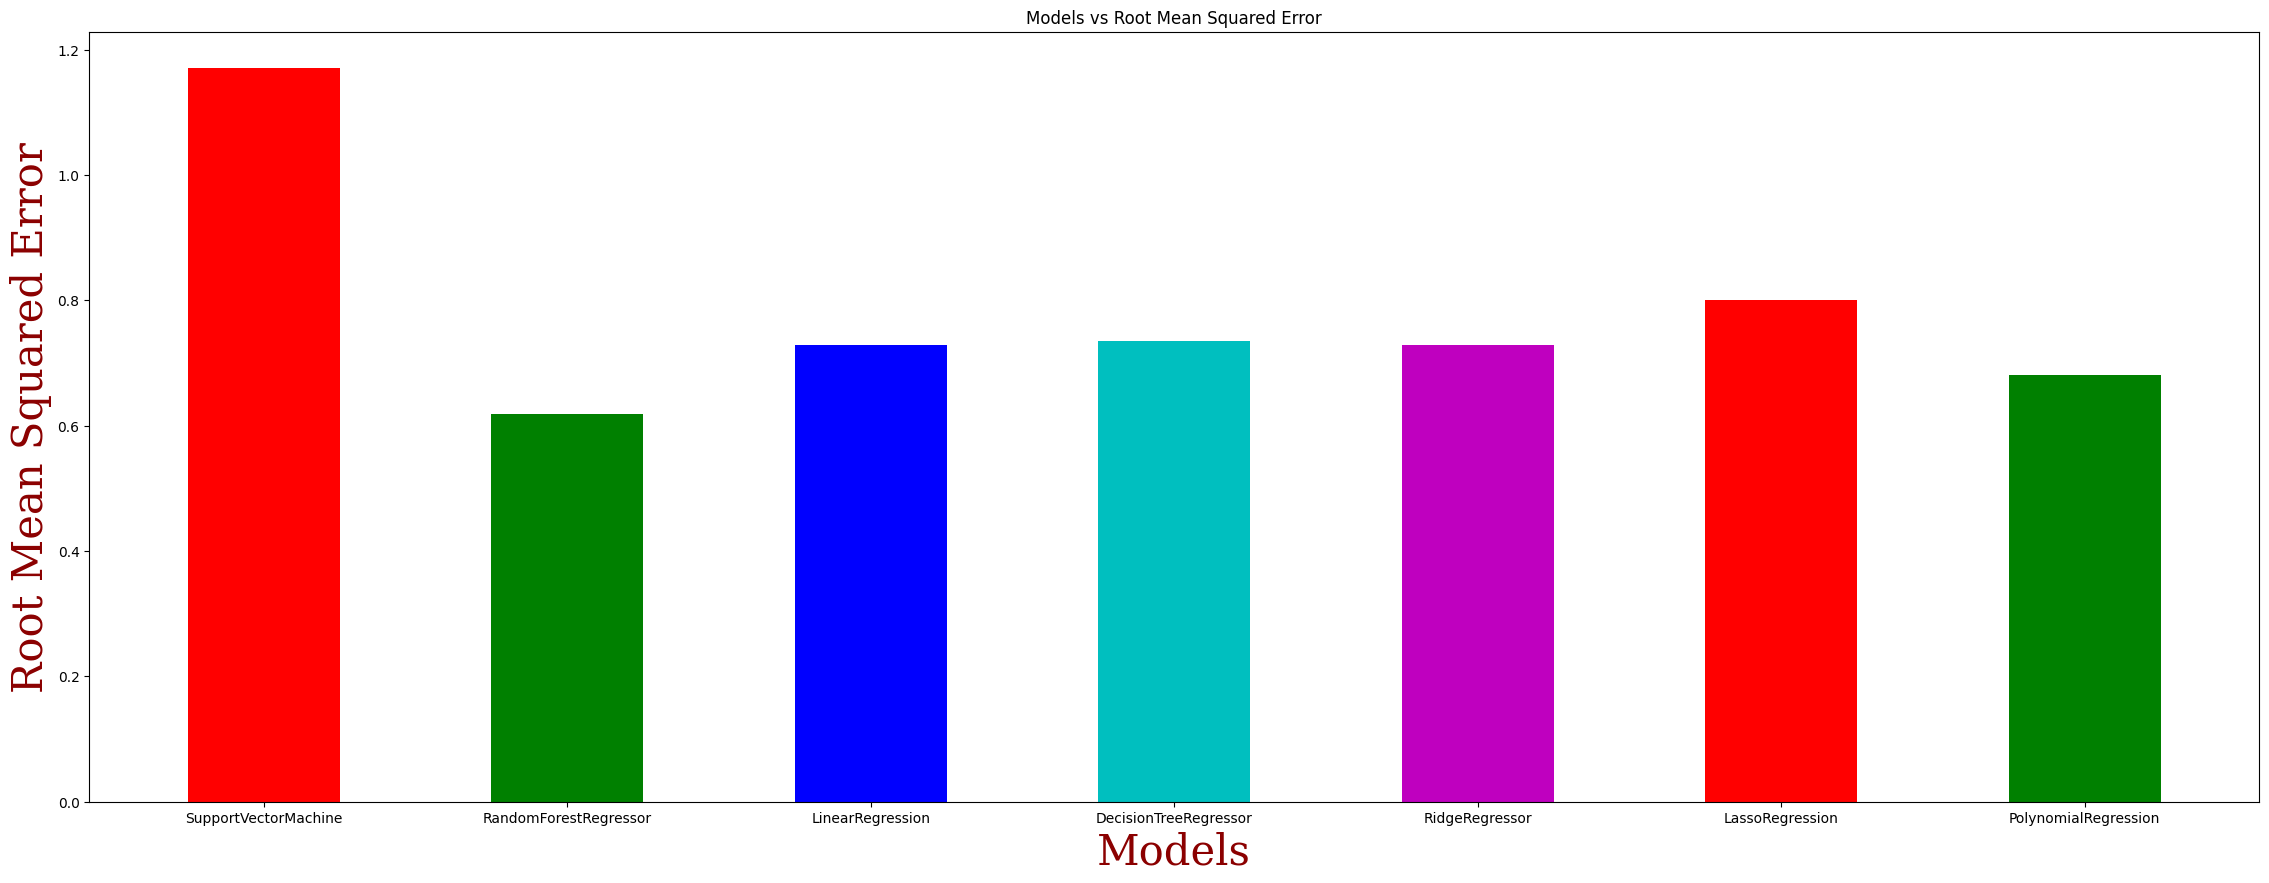

In [ ]:
import matplotlib.pyplot as plt
models = ['SupportVectorMachine', 'RandomForestRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'RidgeRegressor', 'LassoRegression', 'PolynomialRegression']
rmse = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7]
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(models, rmse, width=0.5, color=colors)
plt.title('Models vs Root Mean Squared Error')
plt.xlabel('Models', fontdict = {'family':'serif','color':'darkred','size':30})
plt.ylabel('Root Mean Squared Error', fontdict = {'family':'serif','color':'darkred','size':30})
plt.rc('axes', titlesize=15) 
plt.rc('figure', titlesize=20)  
plt.show()

In [ ]:
test = pd.read_csv("/content/gdrive/MyDrive/Housing Prices/test.csv")

In [ ]:
test

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [ ]:
test_id = test['id'] 

In [ ]:
test_att = test.drop(['id'], axis = 1, inplace = False)

In [ ]:
test_att

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...
24754,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [ ]:
test_id

0        37137
1        37138
2        37139
3        37140
4        37141
         ...  
24754    61891
24755    61892
24756    61893
24757    61894
24758    61895
Name: id, Length: 24759, dtype: int64

In [ ]:
Y_pred = model_RFR.predict(test_att)

In [ ]:
sub = pd.DataFrame(Y_pred)

In [ ]:
sub

,0
0,0.628500
1,0.949900
2,3.444701
3,4.013604
4,2.470900
...,...
24754,1.900800
24755,1.723100
24756,1.091000
24757,3.691001


In [ ]:
result = pd.merge(test_id, sub, left_index=True, right_index=True, how='left')
result.head()

,id,0
0,37137,0.628500
1,37138,0.949900
2,37139,3.444701
3,37140,4.013604
4,37141,2.470900


In [ ]:
result

,id,0
0,37137,0.628500
1,37138,0.949900
2,37139,3.444701
3,37140,4.013604
4,37141,2.470900
...,...,...
24754,61891,1.900800
24755,61892,1.723100
24756,61893,1.091000
24757,61894,3.691001


In [ ]:
result.rename(columns={0:"MedHouseVal"}, inplace = True)

In [ ]:
result

,id,MedHouseVal
0,37137,0.628500
1,37138,0.949900
2,37139,3.444701
3,37140,4.013604
4,37141,2.470900
...,...,...
24754,61891,1.900800
24755,61892,1.723100
24756,61893,1.091000
24757,61894,3.691001


In [ ]:
datatoexcel = pd.ExcelWriter('submission.xlsx')
result.to_excel(datatoexcel)
datatoexcel.save()

In [ ]:
import pickle

In [ ]:
pickle.dump(model_RFR, open('model.pkl','wb'))